In [1]:
import DemoFns as Demo
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from csg import Chromoscalogram as Cscalogram

In [19]:
Demo.record(5)

* recording
* done recording


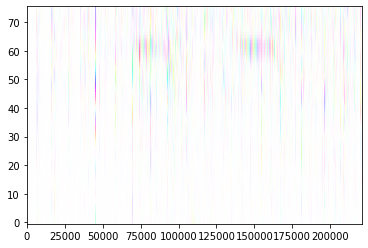

In [20]:
Demo.make_image("output.wav")

In [9]:
from Scalagram import Scalagram
file_location = "/Users/lucasgover/Desktop/Wavelet-Transform/output.wav"
sg = Scalagram(file_location)
image = sg.get_data()

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30

In [12]:
from GAN_DISC import build_discriminator, build_generator
generator =build_generator()
discriminator = build_discriminator(image.shape)

In [13]:
from tensorflow import keras
gan = keras.models.Sequential([generator, discriminator])

In [14]:
discriminator.compile(loss="binary_crossentropy", optimizer="adam")
discriminator.trainable = True
generator.compile(loss="binary_crossentropy", optimizer="adam")
generator.trainable = True
gan.compile(loss="binary_crossentropy", optimizer="adam")

In [21]:
dataset = Demo.make_dataset(image)

In [22]:
Demo.train_gan(gan, discriminator,dataset, batch_size, codings_size, n_epochs=20)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
